# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [2]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
import random
import string
from pprint import pprint
from functions_variables import *
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

## Data Importing

#### - Testing files and paths

In [3]:
test_dir = '../data/AK_Juneau_0.json'
os.path.exists(test_dir)

True

In [4]:
# load one file first to see what type of data you're dealing with and what attributes it has
with open(test_dir) as f:
    data_json = json.load(f)

In [5]:
data_json['data'].keys()

dict_keys(['total', 'count', 'results'])

In [6]:
test_df = pd.json_normalize(data_json['data']['results'])
test_df.head(1)

last_update_date                                               tags  \
0  2023-09-19T20:52:50Z  [carport, community_outdoor_space, cul_de_sac,...   

                                      permalink status  \
0  9453-Herbert-Pl_Juneau_AK_99801_M90744-30767   sold   

                     list_date open_houses  \
0  2023-06-29T21:16:25.000000Z        None   

                                            branding  list_price property_id  \
0  [{'name': 'EXP Realty LLC - Southeast Alaska',...    554950.0  9074430767   

                                              photos  ...  \
0  [{'tags': [{'label': 'house_view', 'probabilit...  ...   

  location.address.state_code location.address.line  \
0                          AK       9453 Herbert Pl   

                            location.street_view_url  \
0  https://maps.googleapis.com/maps/api/streetvie...   

   location.county.fips_code  location.county.name primary_photo  source  \
0                       None                Juneau           NaN     NaN   

  products  location.address.coordinate other_listings  
0      NaN                          NaN            NaN  

[1 rows x 64 columns]

#### - Data Overview

In [7]:
# Getting an overview of the data before combining all the files into one dataframe. This is a custom function in `functions_variables.py` --- It takes in a directory path.
overview = json_files_summary('../data')

PA_Harrisburg_0.json processed. 1/251 files processed.
LA_BatonRouge_2.json processed. 2/251 files processed.
MO_JeffersonCity_0.json processed. 3/251 files processed.
TN_Nashville_2.json processed. 4/251 files processed.
MD_Annapolis_4.json processed. 5/251 files processed.
NM_SantaFe_3.json processed. 6/251 files processed.
AZ_Phoenix_0.json processed. 7/251 files processed.
KY_Frankfort_4.json processed. 8/251 files processed.
CO_Denver_1.json processed. 9/251 files processed.
FL_Tallahassee_3.json processed. 10/251 files processed.
MI_Lansing_2.json processed. 11/251 files processed.
AR_LittleRock_0.json processed. 12/251 files processed.
ME_Augusta_4.json processed. 13/251 files processed.
GA_Atlanta_4.json processed. 14/251 files processed.
IN_Indianapolis_0.json processed. 15/251 files processed.
MN_St.Paul_4.json processed. 16/251 files processed.
MA_Boston_1.json processed. 17/251 files processed.
WI_Madison_1.json processed. 18/251 files processed.
NE_Lincoln_4.json processed

In [8]:
overview
# After reviewing the data with Data Wrangler, I found that some files may be missing the 'results' key, or it is empty.

file_name                        file_path  rows_count  \
0       PA_Harrisburg_0.json     ../data/PA_Harrisburg_0.json          42   
1       LA_BatonRouge_2.json     ../data/LA_BatonRouge_2.json          42   
2    MO_JeffersonCity_0.json  ../data/MO_JeffersonCity_0.json          21   
3        TN_Nashville_2.json      ../data/TN_Nashville_2.json          16   
4        MD_Annapolis_4.json      ../data/MD_Annapolis_4.json          42   
..                       ...                              ...         ...   
245    FL_Tallahassee_0.json    ../data/FL_Tallahassee_0.json          42   
246        MI_Lansing_1.json        ../data/MI_Lansing_1.json          42   
247         CO_Denver_2.json         ../data/CO_Denver_2.json          42   
248     AR_LittleRock_3.json     ../data/AR_LittleRock_3.json          42   
249   IN_Indianapolis_3.json   ../data/IN_Indianapolis_3.json          42   

     cols_count                                          cols_name  
0            59  [last_update_date, tags, permalink, status, li...  
1            64  [last_update_date, tags, permalink, status, li...  
2            64  [last_update_date, tags, permalink, status, li...  
3            64  [last_update_date, tags, permalink, status, li...  
4            60  [last_update_date, tags, permalink, status, li...  
..          ...                                                ...  
245          59  [last_update_date, tags, permalink, status, li...  
246          60  [last_update_date, tags, permalink, status, li...  
247          60  [last_update_date, tags, permalink, status, li...  
248          61  [last_update_date, tags, permalink, status, li...  
249          64  [last_update_date, tags, permalink, status, li...  

[250 rows x 5 columns]

In [9]:
overview.shape

(250, 5)

In [10]:
# 226 -- just chose one of the files that has an empty 'results' key
weird_file_path = overview.iloc[226]['file_path']

with open(weird_file_path) as f:
  weird_file = json.load(f)

weird_file['data'].keys()

dict_keys(['total', 'count', 'results'])

In [11]:
len(weird_file['data']['results']), len(data_json['data']['results']) # Weird vs Normal File

(39, 8)

In [12]:
overview

file_name                        file_path  rows_count  \
0       PA_Harrisburg_0.json     ../data/PA_Harrisburg_0.json          42   
1       LA_BatonRouge_2.json     ../data/LA_BatonRouge_2.json          42   
2    MO_JeffersonCity_0.json  ../data/MO_JeffersonCity_0.json          21   
3        TN_Nashville_2.json      ../data/TN_Nashville_2.json          16   
4        MD_Annapolis_4.json      ../data/MD_Annapolis_4.json          42   
..                       ...                              ...         ...   
245    FL_Tallahassee_0.json    ../data/FL_Tallahassee_0.json          42   
246        MI_Lansing_1.json        ../data/MI_Lansing_1.json          42   
247         CO_Denver_2.json         ../data/CO_Denver_2.json          42   
248     AR_LittleRock_3.json     ../data/AR_LittleRock_3.json          42   
249   IN_Indianapolis_3.json   ../data/IN_Indianapolis_3.json          42   

     cols_count                                          cols_name  
0            59  [last_update_date, tags, permalink, status, li...  
1            64  [last_update_date, tags, permalink, status, li...  
2            64  [last_update_date, tags, permalink, status, li...  
3            64  [last_update_date, tags, permalink, status, li...  
4            60  [last_update_date, tags, permalink, status, li...  
..          ...                                                ...  
245          59  [last_update_date, tags, permalink, status, li...  
246          60  [last_update_date, tags, permalink, status, li...  
247          60  [last_update_date, tags, permalink, status, li...  
248          61  [last_update_date, tags, permalink, status, li...  
249          64  [last_update_date, tags, permalink, status, li...  

[250 rows x 5 columns]

##### - Comparing, Checking files

In [13]:
# 226 -- just chose one of the files that has an empty 'results' key
weird_file_path = overview.iloc[226]['file_path']

with open(weird_file_path) as f:
  weird_file = json.load(f)

weird_file['data'].keys()

dict_keys(['total', 'count', 'results'])

In [14]:
len(weird_file['data']['results']), len(data_json['data']['results']) # Weird vs Normal File

(39, 8)

In [15]:
weird_files = overview[overview['cols_count'] == 0]

weird_files.shape

(32, 5)

In [16]:
# Create a list of files with an empty 'results' key or has other problems
weird = []
extra_weird = []
  
for file in weird_files['file_path']:
  
  with open(file) as f:
    weird_file = json.load(f)
  
  if len(weird_file['data']['results']) == 0:
    print(f'{file} returns empty \'results\'')
    weird.append(file)
  
  else:
    print(f'{file} has another problem...')
    extra_weird.append(file)

../data/ME_Augusta_4.json returns empty 'results'
../data/MS_Jackson_0.json returns empty 'results'
../data/MS_Jackson_1.json returns empty 'results'
../data/WY_Cheyenne_4.json returns empty 'results'
../data/VT_Montpelier_4.json returns empty 'results'
../data/WY_Cheyenne_3.json returns empty 'results'
../data/SD_Pierre_0.json returns empty 'results'
../data/ME_Augusta_2.json returns empty 'results'
../data/VT_Montpelier_3.json returns empty 'results'
../data/ME_Augusta_3.json returns empty 'results'
../data/VT_Montpelier_2.json returns empty 'results'
../data/SD_Pierre_1.json returns empty 'results'
../data/WY_Cheyenne_2.json returns empty 'results'
../data/SD_Pierre_2.json returns empty 'results'
../data/MS_Jackson_4.json returns empty 'results'
../data/NH_Concord_4.json returns empty 'results'
../data/WY_Cheyenne_1.json returns empty 'results'
../data/VT_Montpelier_1.json returns empty 'results'
../data/ME_Augusta_0.json returns empty 'results'
../data/ND_Bismarck_2.json returns em

In [17]:
print(f'\n{len(weird)} Weird Files...\n{weird}')
print(f'\n{len(extra_weird)} Extra Weird Files... \n{extra_weird}')


32 Weird Files...
['../data/ME_Augusta_4.json', '../data/MS_Jackson_0.json', '../data/MS_Jackson_1.json', '../data/WY_Cheyenne_4.json', '../data/VT_Montpelier_4.json', '../data/WY_Cheyenne_3.json', '../data/SD_Pierre_0.json', '../data/ME_Augusta_2.json', '../data/VT_Montpelier_3.json', '../data/ME_Augusta_3.json', '../data/VT_Montpelier_2.json', '../data/SD_Pierre_1.json', '../data/WY_Cheyenne_2.json', '../data/SD_Pierre_2.json', '../data/MS_Jackson_4.json', '../data/NH_Concord_4.json', '../data/WY_Cheyenne_1.json', '../data/VT_Montpelier_1.json', '../data/ME_Augusta_0.json', '../data/ND_Bismarck_2.json', '../data/HI_Honolulu_3.json', '../data/ND_Bismarck_3.json', '../data/VT_Montpelier_0.json', '../data/ME_Augusta_1.json', '../data/WY_Cheyenne_0.json', '../data/SD_Pierre_3.json', '../data/ND_Bismarck_4.json', '../data/SD_Pierre_4.json', '../data/MS_Jackson_2.json', '../data/NH_Concord_3.json', '../data/MS_Jackson_3.json', '../data/HI_Honolulu_4.json']

0 Extra Weird Files... 
[]


In [18]:
# Safe to drop the weird files from the overview dataframe
drop = [i for i in weird_files.index]

overview.drop(drop, inplace=True) # Originally 250, 5

In [19]:
overview.shape

(218, 5)

In [20]:
overview # I will use the file_path column to load the data

file_name                        file_path  rows_count  \
0       PA_Harrisburg_0.json     ../data/PA_Harrisburg_0.json          42   
1       LA_BatonRouge_2.json     ../data/LA_BatonRouge_2.json          42   
2    MO_JeffersonCity_0.json  ../data/MO_JeffersonCity_0.json          21   
3        TN_Nashville_2.json      ../data/TN_Nashville_2.json          16   
4        MD_Annapolis_4.json      ../data/MD_Annapolis_4.json          42   
..                       ...                              ...         ...   
245    FL_Tallahassee_0.json    ../data/FL_Tallahassee_0.json          42   
246        MI_Lansing_1.json        ../data/MI_Lansing_1.json          42   
247         CO_Denver_2.json         ../data/CO_Denver_2.json          42   
248     AR_LittleRock_3.json     ../data/AR_LittleRock_3.json          42   
249   IN_Indianapolis_3.json   ../data/IN_Indianapolis_3.json          42   

     cols_count                                          cols_name  
0            59  [last_update_date, tags, permalink, status, li...  
1            64  [last_update_date, tags, permalink, status, li...  
2            64  [last_update_date, tags, permalink, status, li...  
3            64  [last_update_date, tags, permalink, status, li...  
4            60  [last_update_date, tags, permalink, status, li...  
..          ...                                                ...  
245          59  [last_update_date, tags, permalink, status, li...  
246          60  [last_update_date, tags, permalink, status, li...  
247          60  [last_update_date, tags, permalink, status, li...  
248          61  [last_update_date, tags, permalink, status, li...  
249          64  [last_update_date, tags, permalink, status, li...  

[218 rows x 5 columns]

##### - Resuming Data Import Procedures

In [21]:
# Testing the custom function `read_json` which takes a file path and returns a DataFrame
read_json(test_dir).head(2) # Works!

last_update_date                                               tags  \
0  2023-09-19T20:52:50Z  [carport, community_outdoor_space, cul_de_sac,...   
1                  None                                               None   

                                           permalink status  \
0       9453-Herbert-Pl_Juneau_AK_99801_M90744-30767   sold   
1  8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...   sold   

                     list_date open_houses  \
0  2023-06-29T21:16:25.000000Z        None   
1                         None        None   

                                            branding  list_price property_id  \
0  [{'name': 'EXP Realty LLC - Southeast Alaska',...    554950.0  9074430767   
1  [{'name': None, 'photo': None, 'type': 'Office'}]         NaN  9424983842   

                                              photos  ...  \
0  [{'tags': [{'label': 'house_view', 'probabilit...  ...   
1                                               None  ...   

  location.address.state_code     location.address.line  \
0                          AK           9453 Herbert Pl   
1                          AK  8477 Thunder Mountain Rd   

                            location.street_view_url  \
0  https://maps.googleapis.com/maps/api/streetvie...   
1  https://maps.googleapis.com/maps/api/streetvie...   

   location.county.fips_code  location.county.name primary_photo  source  \
0                       None                Juneau           NaN     NaN   
1                       None                Juneau           NaN     NaN   

  products  location.address.coordinate other_listings  
0      NaN                          NaN            NaN  
1      NaN                          NaN            NaN  

[2 rows x 64 columns]

In [22]:
# loop over all files and put them into a dataframe
combine_all = []

for path in overview['file_path']:
  df = read_json(path)
  combine_all.append(df)
  print(f'{path} added to the list. {len(combine_all)}/{overview.shape[0]} processed...')

print(f'\n{len(combine_all)} files loaded into the list of DataFrames.')

../data/PA_Harrisburg_0.json added to the list. 1/218 processed...
../data/LA_BatonRouge_2.json added to the list. 2/218 processed...
../data/MO_JeffersonCity_0.json added to the list. 3/218 processed...
../data/TN_Nashville_2.json added to the list. 4/218 processed...
../data/MD_Annapolis_4.json added to the list. 5/218 processed...
../data/NM_SantaFe_3.json added to the list. 6/218 processed...
../data/AZ_Phoenix_0.json added to the list. 7/218 processed...
../data/KY_Frankfort_4.json added to the list. 8/218 processed...
../data/CO_Denver_1.json added to the list. 9/218 processed...
../data/FL_Tallahassee_3.json added to the list. 10/218 processed...
../data/MI_Lansing_2.json added to the list. 11/218 processed...
../data/AR_LittleRock_0.json added to the list. 12/218 processed...
../data/GA_Atlanta_4.json added to the list. 13/218 processed...
../data/IN_Indianapolis_0.json added to the list. 14/218 processed...
../data/MN_St.Paul_4.json added to the list. 15/218 processed...
../da

In [23]:
housing_dataset = pd.concat(combine_all, ignore_index=True)

housing_dataset.shape

/var/folders/fw/lz_dq12943g7483s5hr18pmm0000gn/T/ipykernel_45674/3315332010.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  housing_dataset = pd.concat(combine_all, ignore_index=True)


(8159, 67)

#### - Saving outputs...

In [24]:
output_path = '../outputs'

# --- !!! Uncomment only when saving. Run once and put the # back. !!! --- #
# housing_dataset.to_csv(os.path.join(output_path, 'housing_dataset.csv'), index=False)

#### - Load

In [25]:
housing_df = pd.read_csv(os.path.join(output_path, 'housing_dataset.csv'))

housing_df.shape

(8159, 67)

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

#### - Quick look at the data and the values in them.

In [26]:
data = housing_df.copy()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   last_update_date                       8125 non-null   object 
 1   tags                                   7638 non-null   object 
 2   permalink                              8159 non-null   object 
 3   status                                 8159 non-null   object 
 4   list_date                              7752 non-null   object 
 5   open_houses                            0 non-null      float64
 6   branding                               8159 non-null   object 
 7   list_price                             7721 non-null   float64
 8   property_id                            8159 non-null   int64  
 9   photos                                 7403 non-null   object 
 10  community                              0 non-null      float64
 11  virt

In [28]:
data.describe()

open_houses    list_price   property_id  community    listing_id  \
count          0.0  7.721000e+03  8.159000e+03        0.0  7.752000e+03   
mean           NaN  4.341582e+05  5.755508e+09        NaN  2.957819e+09   
std            NaN  5.514925e+05  2.687366e+09        NaN  7.541620e+07   
min            NaN  1.000000e+00  1.003443e+09        NaN  6.052327e+08   
25%            NaN  2.090000e+05  3.307743e+09        NaN  2.959499e+09   
50%            NaN  3.250000e+05  6.000993e+09        NaN  2.960836e+09   
75%            NaN  4.999000e+05  8.169927e+09        NaN  2.961805e+09   
max            NaN  1.250000e+07  9.993679e+09        NaN  2.963230e+09   

       price_reduced_amount  source.plan_id  description.year_built  \
count          2.484000e+03    5.000000e+00             7316.000000   
mean           2.442704e+04    4.170007e+11             1968.916074   
std            7.162396e+04    0.000000e+00               35.096914   
min            1.000000e+02    4.170007e+11             1828.000000   
25%            6.000000e+03    4.170007e+11             1950.000000   
50%            1.010000e+04    4.170007e+11             1975.000000   
75%            2.000000e+04    4.170007e+11             1997.000000   
max            2.015999e+06    4.170007e+11             2024.000000   

       description.baths_3qtr  description.sold_price  ...  \
count              566.000000            6.716000e+03  ...   
mean                 1.247350            4.126050e+05  ...   
std                  0.463482            6.994308e+05  ...   
min                  1.000000            3.080000e+02  ...   
25%                  1.000000            1.910000e+05  ...   
50%                  1.000000            3.140000e+05  ...   
75%                  1.000000            4.700000e+05  ...   
max                  3.000000            2.706500e+07  ...   

       location.address.postal_code  location.address.coordinate.lon  \
count                   8159.000000                      7909.000000   
mean                   50946.997181                       -92.206522   
std                    29257.110670                        15.888886   
min                     2111.000000                      -157.810583   
25%                    25314.000000                      -104.971611   
50%                    50310.000000                       -89.333131   
75%                    78739.000000                       -78.617690   
max                    99801.000000                       -71.006343   

       location.address.coordinate.lat  location.county.fips_code  \
count                      7909.000000                7588.000000   
mean                         39.009689               28000.253295   
std                           4.374553               15586.751739   
min                          21.277707                1101.000000   
25%                          35.688084               16001.000000   
50%                          39.698210               27123.000000   
75%                          41.832266               41047.000000   
max                          58.396178               55025.000000   

       primary_photo  source  products  location.address.coordinate  \
count            0.0     0.0       0.0                          0.0   
mean             NaN     NaN       NaN                          NaN   
std              NaN     NaN       NaN                          NaN   
min              NaN     NaN       NaN                          NaN   
25%              NaN     NaN       NaN                          NaN   
50%              NaN     NaN       NaN                          NaN   
75%              NaN     NaN       NaN                          NaN   
max              NaN     NaN       NaN                          NaN   

       other_listings  location.county  
count             0.0              0.0  
mean              NaN              NaN  
std               NaN              NaN  
min               NaN              NaN  
25%             

In [29]:
u = data.nunique()

for i in u.index:
  print(f'{u[i]} :: :: :: {i}')

1716 :: :: :: last_update_date
1628 :: :: :: tags
1795 :: :: :: permalink
1 :: :: :: status
1636 :: :: :: list_date
0 :: :: :: open_houses
996 :: :: :: branding
711 :: :: :: list_price
1795 :: :: :: property_id
1627 :: :: :: photos
0 :: :: :: community
290 :: :: :: virtual_tours
1704 :: :: :: listing_id
145 :: :: :: price_reduced_amount
2 :: :: :: matterport
1627 :: :: :: primary_photo.href
1 :: :: :: source.plan_id
393 :: :: :: source.agents
1 :: :: :: source.spec_id
1 :: :: :: source.type
147 :: :: :: description.year_built
3 :: :: :: description.baths_3qtr
127 :: :: :: description.sold_date
738 :: :: :: description.sold_price
8 :: :: :: description.baths_full
0 :: :: :: description.name
5 :: :: :: description.baths_half
743 :: :: :: description.lot_sqft
1119 :: :: :: description.sqft
10 :: :: :: description.baths
2 :: :: :: description.sub_type
0 :: :: :: description.baths_1qtr
9 :: :: :: description.garage
7 :: :: :: description.stories
13 :: :: :: description.beds
11 :: :: :: desc

In [30]:
# Quick look at the columns and the data in it -- Using a custom function, it sorts the df by the number of unique values in each column as well. 
columns_overview = cols_overview(data)

columns_overview.head()

nulls_count                   col_name col_dtype  nunique unique  \
66         8159            location.county   float64        0  [nan]   
10         8159                  community   float64        0  [nan]   
25         8159           description.name   float64        0  [nan]   
37         8159  flags.is_new_construction   float64        0  [nan]   
38         8159          flags.is_for_rent   float64        0  [nan]   

                   col_data_1                 col_data_2  
66  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
10  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
25  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
37  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
38  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]

#### - Pre-cleaning, Dropping rows.

> Some sales may not actually include the sale price (target).  These rows should be dropped.

> Don't keep the list price because it will be too close to the sale price.

In [31]:
data.shape, data.columns

((8159, 67),
 Index(['last_update_date', 'tags', 'permalink', 'status', 'list_date',
        'open_houses', 'branding', 'list_price', 'property_id', 'photos',
        'community', 'virtual_tours', 'listing_id', 'price_reduced_amount',
        'matterport', 'primary_photo.href', 'source.plan_id', 'source.agents',
        'source.spec_id', 'source.type', 'description.year_built',
        'description.baths_3qtr', 'description.sold_date',
        'description.sold_price', 'description.baths_full', 'description.name',
        'description.baths_half', 'description.lot_sqft', 'description.sqft',
        'description.baths', 'description.sub_type', 'description.baths_1qtr',
        'description.garage', 'description.stories', 'description.beds',
        'description.type', 'lead_attributes.show_contact_an_agent',
        'flags.is_new_construction', 'flags.is_for_rent',
        'flags.is_subdivision', 'flags.is_contingent', 'flags.is_price_reduced',
        'flags.is_pending', 'flags.is_fore

In [32]:
drop_cols = ['list_price',
             'source.type', 
             'source.agents', 
             'last_update_date', 
             'price_reduced_amount',
             'other_listings.rdc',
             'last_update_date',
             'location.street_view_url',
             'matterport',
             'products.brand_name',
             'lead_attributes.show_contact_an_agent',
             'permalink',
             'virtual_tours',
             'location.address.line',
             'description.sub_type',
             'flags.is_new_listing',
             'location.county.fips_code',
             'flags.is_price_reduced',
             'flags.is_foreclosure',
             'branding',
             'primary_photo.href',
             'photos',
             'listing_id',
             'list_date',
             'location.address.state',
             'description.sold_date']

# Dropped 'location.address.line' and 'location.county.fips_code' because we don't need it. Lat/Lon is enough.
# 'listing_id' is redundant, we have 'property_id'
# 'location.address.state' it's just the word version, i'm keeping the abbreviation.

data.drop(drop_cols, axis=1, inplace=True)
data.shape

(8159, 42)

#### - Missing sold_price

In [33]:
data['description.sold_price'].isnull().sum()

1443

In [34]:
missing_sold_price = data[data['description.sold_price'].isnull()]

missing_sold_price

tags status  open_houses  \
0     ['carport', 'community_outdoor_space', 'cul_de...   sold          NaN   
1                                                   NaN   sold          NaN   
2                                                   NaN   sold          NaN   
3                                                   NaN   sold          NaN   
4                                                   NaN   sold          NaN   
...                                                 ...    ...          ...   
7320  ['central_air', 'central_heat', 'community_out...   sold          NaN   
7321  ['central_air', 'community_outdoor_space', 'la...   sold          NaN   
7322  ['central_heat', 'community_outdoor_space', 'l...   sold          NaN   
7323  ['rental_property', 'investment_opportunity', ...   sold          NaN   
7324  ['central_air', 'community_outdoor_space', 'fi...   sold          NaN   

      property_id  community  source.plan_id source.spec_id  \
0      9074430767        NaN             NaN            NaN   
1      9424983842        NaN             NaN            NaN   
2      9479068516        NaN             NaN            NaN   
3      9879331943        NaN             NaN            NaN   
4      9521639574        NaN             NaN            NaN   
...           ...        ...             ...            ...   
7320   1834972490        NaN             NaN            NaN   
7321   2597824245        NaN             NaN            NaN   
7322   1641410738        NaN             NaN            NaN   
7323   1479984642        NaN             NaN            NaN   
7324   1262473485        NaN             NaN            NaN   

      description.year_built  description.baths_3qtr  description.sold_price  \
0                     1963.0                     NaN                     NaN   
1                        NaN                     NaN                     NaN   
2                        NaN                     NaN                     NaN   
3                        NaN                     NaN                     NaN   
4                        NaN                     NaN                     NaN   
...                      ...                     ...                     ...   
7320                  1975.0                     1.0                     NaN   
7321                  2014.0                     NaN                     NaN   
7322                  1910.0                     1.0                     NaN   
7323                  1940.0                     NaN                     NaN   
7324                  1915.0                     2.0                     NaN   

      ...  location.address.state_code  location.county.name  primary_photo  \
0     ...                           AK                Juneau            NaN   
1     ...                           AK                Juneau            NaN   
2     ...                           AK                Juneau            NaN   
3     ...                           AK                Juneau            NaN   
4     ...                           AK                Juneau            NaN   
...   ...                          ...                   ...            ...   
7320  ...                           UT             Salt Lake            NaN   
7321  ...                           UT             Salt Lake            NaN   
7322  ...                           UT             Salt Lake            NaN   
7323  ...                           UT             Salt Lake            NaN   
7324  ...                           UT             Salt Lake            NaN   

      source  products  location.address.coordinate  other_listings  \
0        NaN       NaN                          NaN             NaN   
1        NaN       NaN                          NaN             NaN   
2        NaN       NaN                          NaN             NaN   
3        NaN       NaN                          NaN             NaN   
4        NaN       NaN                          NaN             NaN   
...      

In [35]:
# Drop rows where 'description.sold_price' is NaN
data.dropna(subset=['description.sold_price'], inplace=True)

In [36]:
data.shape

(6716, 42)

#### Dealing with Nulls

In [37]:
# Re-run the cols_overview function
columns_overview = cols_overview(data)

columns_overview.head()

nulls_count                     col_name col_dtype  nunique unique  \
21         6716    flags.is_new_construction   float64        0  [nan]   
16         6716       description.baths_1qtr   float64        0  [nan]   
38         6716               other_listings   float64        0  [nan]   
37         6716  location.address.coordinate   float64        0  [nan]   
36         6716                     products   float64        0  [nan]   

                   col_data_1                 col_data_2  
21  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
16  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
38  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
37  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
36  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]

##### - 6716 nulls (17 Empty columns)

In [38]:
empties = columns_overview[columns_overview['nulls_count'] == data.shape[0]]

empties.head()

nulls_count                     col_name col_dtype  nunique unique  \
21         6716    flags.is_new_construction   float64        0  [nan]   
16         6716       description.baths_1qtr   float64        0  [nan]   
38         6716               other_listings   float64        0  [nan]   
37         6716  location.address.coordinate   float64        0  [nan]   
36         6716                     products   float64        0  [nan]   

                   col_data_1                 col_data_2  
21  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
16  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
38  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
37  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
36  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]

In [39]:
is_empty = [i for i in empties['col_name']]

len(is_empty), is_empty

(17,
 ['flags.is_new_construction',
  'description.baths_1qtr',
  'other_listings',
  'location.address.coordinate',
  'products',
  'source',
  'primary_photo',
  'flags.is_coming_soon',
  'flags.is_plan',
  'flags.is_pending',
  'flags.is_contingent',
  'flags.is_subdivision',
  'flags.is_for_rent',
  'location.county',
  'description.name',
  'open_houses',
  'community'])

In [40]:
# Drop the columns that are empty
data.drop(columns=is_empty, inplace=True)

data.shape[1] # From 58

25

In [41]:
# Drop removed columns from columns_overview
columns_overview.drop(index=empties.index, inplace=True)

columns_overview.shape

(25, 7)

In [42]:
# Re-run the cols_overview function
columns_overview = cols_overview(data)

columns_overview.head()

nulls_count                    col_name col_dtype  nunique  \
24         6711  community.description.name    object        1   
23         6711       community.advertisers    object        1   
3          6711              source.plan_id   float64        1   
4          6711              source.spec_id    object        1   
6          6343      description.baths_3qtr   float64        2   

                                               unique  \
24                       [nan, Woods of Copper Creek]   
23  [nan, [{'office': {'hours': 'Monday - Saturday...   
3                               [nan, 417000743767.0]   
4                     [nan, 365-36546-365750000-0016]   
6                                     [nan, 2.0, 1.0]   

                   col_data_1                 col_data_2  
24  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
23  [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
3   [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
4   [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]  
6   [nan, nan, nan, nan, nan]  [nan, nan, nan, nan, nan]

##### - 6711 Nulls : `['community.description.name', 'source.plan_id', 'source.spec_id', 'community.advertisers']`

In [43]:
remove = columns_overview[columns_overview['nulls_count'] == 6711]['col_name']

remove_cols = [i for i in remove]
remove_cols

['community.description.name',
 'community.advertisers',
 'source.plan_id',
 'source.spec_id']

In [44]:
data.drop(columns=remove_cols, inplace=True)

data.shape[1] # From 41

21

In [45]:
# Re-run the cols_overview function
columns_overview = cols_overview(data)

columns_overview.head()

nulls_count                col_name col_dtype  nunique  \
4          6343  description.baths_3qtr   float64        2   
7          4739  description.baths_half   float64        5   
11         3231      description.garage   float64        9   
12         1617     description.stories   float64        7   
8           922    description.lot_sqft   float64      609   

                                               unique  \
4                                     [nan, 2.0, 1.0]   
7                      [nan, 1.0, 2.0, 3.0, 4.0, 5.0]   
11  [2.0, 1.0, nan, 3.0, 4.0, 5.0, 9.0, 8.0, 6.0, ...   
12          [1.0, 2.0, nan, 3.0, 10.0, 6.0, 8.0, 4.0]   
8   [11761.0, 6534.0, 17424.0, 9712.0, 10890.0, 12...   

                                     col_data_1  \
4                     [nan, nan, nan, nan, nan]   
7                     [nan, nan, nan, nan, nan]   
11                    [2.0, 1.0, nan, nan, nan]   
12                    [1.0, 2.0, 1.0, 1.0, 1.0]   
8   [11761.0, 6534.0, 17424.0, 9712.0, 10890.0]   

                                 col_data_2  
4                 [nan, nan, nan, nan, nan]  
7                 [nan, nan, nan, nan, nan]  
11                [1.0, nan, nan, nan, nan]  
12                [2.0, nan, nan, nan, nan]  
8   [4792.0, 7841.0, 65340.0, nan, 52272.0]

##### - 6343 Nulls : `'description.baths_3qtr'`

In [46]:
# Replacing the NaN values with 0
data['description.baths_3qtr'] = data['description.baths_3qtr'].fillna(0.)

data['description.baths_3qtr'].unique()

array([0., 2., 1.])

##### - 4739 Nulls : `'description.baths_half'`

In [47]:
# It's possible to have 0 half baths. Replacing the NaN values with 0
data['description.baths_half'] = data['description.baths_half'].fillna(0.)

data['description.baths_half'].unique(), data['description.baths_half'].isnull().sum()

(array([0., 1., 2., 3., 4., 5.]), 0)

In [48]:
# Re-run the cols_overview function
columns_overview = cols_overview(data)

columns_overview.head()

nulls_count                col_name col_dtype  nunique  \
11         3231      description.garage   float64        9   
12         1617     description.stories   float64        7   
8           922    description.lot_sqft   float64      609   
6           677  description.baths_full   float64        7   
3           675  description.year_built   float64      144   

                                               unique  \
11  [2.0, 1.0, nan, 3.0, 4.0, 5.0, 9.0, 8.0, 6.0, ...   
12          [1.0, 2.0, nan, 3.0, 10.0, 6.0, 8.0, 4.0]   
8   [11761.0, 6534.0, 17424.0, 9712.0, 10890.0, 12...   
6            [2.0, nan, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0]   
3   [1998.0, 1945.0, 1969.0, 1955.0, 1984.0, 1999....   

                                     col_data_1  \
11                    [2.0, 1.0, nan, nan, nan]   
12                    [1.0, 2.0, 1.0, 1.0, 1.0]   
8   [11761.0, 6534.0, 17424.0, 9712.0, 10890.0]   
6                     [2.0, 2.0, 2.0, 2.0, 2.0]   
3      [1998.0, 1945.0, 1969.0, 1955.0, 1984.0]   

                                 col_data_2  
11                [1.0, nan, nan, nan, nan]  
12                [2.0, nan, nan, nan, nan]  
8   [4792.0, 7841.0, 65340.0, nan, 52272.0]  
6                 [1.0, 1.0, 1.0, nan, 2.0]  
3           [1910.0, nan, nan, nan, 1950.0]

##### - 3231 Nulls : `'description.garage'`

In [49]:
# # We can assume Nan means no garage. Replacing the NaN values with 0
data['description.garage'] = data['description.garage'].fillna(0.)

##### - 1617 Nulls : `'description.stories'`

In [50]:
data['description.stories'].unique() # No 0 stories. Replacing the NaN values with 0

array([ 1.,  2., nan,  3., 10.,  6.,  8.,  4.])

In [51]:
data['description.stories'] = data['description.stories'].fillna(0.)

data['description.stories'].unique(), data['description.stories'].isnull().sum()

(array([ 1.,  2.,  0.,  3., 10.,  6.,  8.,  4.]), 0)

##### - 1168 & 655 Nulls : `['description.lot_sqft', 'description.sqft']`

In [52]:
# Columns appear to be related, may be redundant.
lot_sizes = data[data[['description.lot_sqft', 'description.sqft']].isnull().any(axis=1)]

lot_sizes[['description.lot_sqft', 'description.sqft']]

description.lot_sqft  description.sqft
40               3397680.0               NaN
81               3397680.0               NaN
121              3397680.0               NaN
162              3397680.0               NaN
203              3397680.0               NaN
...                    ...               ...
8147               18295.0               NaN
8150                8276.0               NaN
8151                   NaN             771.0
8152                   NaN            1664.0
8157                   NaN               NaN

[1286 rows x 2 columns]

In [53]:
lot_sizes.loc[:, 'check_property.sqft'] = lot_sizes['description.lot_sqft'] == lot_sizes['description.sqft']

lot_sizes[lot_sizes['check_property.sqft']==True]

/var/folders/fw/lz_dq12943g7483s5hr18pmm0000gn/T/ipykernel_45674/197350453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lot_sizes.loc[:, 'check_property.sqft'] = lot_sizes['description.lot_sqft'] == lot_sizes['description.sqft']


Empty DataFrame
Columns: [tags, status, property_id, description.year_built, description.baths_3qtr, description.sold_price, description.baths_full, description.baths_half, description.lot_sqft, description.sqft, description.baths, description.garage, description.stories, description.beds, description.type, location.address.postal_code, location.address.coordinate.lon, location.address.coordinate.lat, location.address.city, location.address.state_code, location.county.name, check_property.sqft]
Index: []

[0 rows x 22 columns]

In [54]:
# Merge 'description.lot_sqft' and 'description.sqft' into a new column 'property.sqft'
data['property.sqft'] = data['description.lot_sqft'].combine_first(data['description.sqft'])

data['property.sqft'].isnull().sum()

291

In [55]:
drop_cols = ['description.lot_sqft', 'description.sqft']

data.drop(columns=drop_cols, inplace=True)

##### - 291 Nulls : `'property.sqft'`

In [56]:
leftover_missing_sqft = data[data['property.sqft'].isnull()]

# Drop rows where 'property.sqft' is NaN
data.dropna(subset=['property.sqft'], inplace=True)

##### - 677 Nulls : `'description.baths_full'`

In [57]:
# Replacing the NaN values with 0
data['description.baths_full'] = data['description.baths_full'].fillna(0.)

In [58]:
# Re-run the cols_overview function
columns_overview = cols_overview(data)

columns_overview.head(10)

nulls_count                         col_name col_dtype  nunique  \
3           463           description.year_built   float64      144   
11          321                 description.beds   float64       13   
0           189                             tags    object     1339   
8           120                description.baths   float64       10   
15           99  location.address.coordinate.lat   float64     1384   
14           99  location.address.coordinate.lon   float64     1383   
18           10             location.county.name    object       55   
16            5            location.address.city    object       82   
17            0      location.address.state_code    object       35   
13            0     location.address.postal_code     int64      403   

                                               unique  \
3   [1998.0, 1945.0, 1969.0, 1955.0, 1984.0, 1999....   
11  [3.0, 4.0, nan, 2.0, 5.0, 1.0, 6.0, 12.0, 7.0,...   
0   [['central_air', 'central_heat', 'community_ou...   
8   [2.0, 3.0, 0.0, 1.0, 4.0, 5.0, nan, 6.0, 7.0, ...   
15  [32.389075, 32.382748, 32.380023, 32.386844, 3...   
14  [-86.178412, -86.273286, -86.221454, -86.28438...   
18  [Montgomery, Pulaski, Saline, Maricopa, Sacram...   
16  [Montgomery, Little Rock, Mabelvale, Alexander...   
17  [AL, AR, AZ, CA, CO, CT, DE, FL, GA, HI, IA, I...   
13  [36117, 36107, 36109, 36106, 36116, 36108, 361...   

                                           col_data_1  \
3            [1998.0, 1945.0, 1969.0, 1955.0, 1984.0]   
11                          [3.0, 4.0, 3.0, 3.0, 3.0]   
0   [['central_air', 'central_heat', 'community_ou...   
8                           [2.0, 2.0, 2.0, 2.0, 2.0]   
15  [32.389075, 32.382748, 32.380023, 32.386844, 3...   
14  [-86.178412, -86.273286, -86.221454, -86.28438...   
18  [Montgomery, Montgomery, Montgomery, Montgomer...   
16  [Montgomery, Montgomery, Montgomery, Montgomer...   
17                               [AL, AL, AL, AL, AL]   
13                [36117, 36107, 36109, 36107, 36106]   

                                           col_data_2  
3                     [nan, 1910.0, nan, nan, 1950.0]  
11                          [5.0, 3.0, 3.0, 3.0, 3.0]  
0   [['basement', 'garage_1_or_more', 'garage_2_or...  
8                           [2.0, 1.0, 1.0, 1.0, 2.0]  
15  [38.366388, 38.341576, 38.377371, 38.338617, 3...  
14  [-81.643303, -81.644994, -81.661662, -81.65988...  
18      [Kanawha, Kanawha, Kanawha, Kanawha, Kanawha]  
16  [Charleston, Charleston, Charleston, Charlesto...  
17                               [WV, WV, WV, WV, WV]  
13                [25302, 25314, 25387, 25314, 25302]

##### - 675 Nulls : `'description.year_built'`

In [59]:
# data[data['description.year_built'].isnull()]

In [60]:
# I'll fill the values with the median year built in the dataset, based the city.
# Calculate the median year built for each city, excluding NaN values
median_year_built_by_city = data.groupby('location.address.city')['description.year_built'].transform('median')

# Replace NaN values in 'description.year_built' with the median year built for the corresponding city
data['description.year_built'] = data['description.year_built'].fillna(median_year_built_by_city)

In [61]:
data['description.year_built'].isnull().sum()

37

In [62]:
# There are 85 rows with NaN values in 'description.year_built'. I'll fill them with the median year built in the dataset.
# Calculate the overall median year built, excluding NaN values
overall_median_year_built = data['description.year_built'].median()

# Replace remaining NaN values in 'description.year_built' with the overall median year built
data['description.year_built'] = data['description.year_built'].fillna(overall_median_year_built)

In [63]:
data['description.year_built'].isnull().sum()

0

In [64]:
# Add new column with current age of the property
year = 2025
data['property_age'] = year - data['description.year_built']

data['property_age'].min(), data['property_age'].max()

(2.0, 197.0)

In [65]:
# Drop 'description.year_built' column
data.drop(columns=['description.year_built'], inplace=True)

##### - 493 Nulls : `'description.beds'`

In [66]:
check_type = data[data['description.beds'].isnull()] # Null values in 'description.beds'
review = check_type[['description.beds', 'description.type']] # Checking the  type of the property

review['description.type'].unique()

array(['land', 'multi_family', 'single_family', 'other', 'mobile'],
      dtype=object)

In [67]:
# Group by type and calculate the median number of beds for each type
median_beds_by_type = data.groupby('description.type')['description.beds'].transform('median')

# Replace NaN values in 'description.beds' with the median number of beds for the corresponding type
data['description.beds'] = data['description.beds'].fillna(median_beds_by_type)

data['description.beds'].isnull().sum()

5

In [68]:
data[data['description.beds'].isnull()]

tags status  property_id  description.baths_3qtr  description.sold_price  \
2376  NaN   sold   9515169963                     0.0                275000.0   
2412  NaN   sold   9515169963                     0.0                275000.0   
2447  NaN   sold   9515169963                     0.0                275000.0   
2481  NaN   sold   9515169963                     0.0                275000.0   
2514  NaN   sold   9515169963                     0.0                275000.0   

      description.baths_full  description.baths_half  description.baths  \
2376                     0.0                     0.0                0.0   
2412                     0.0                     0.0                0.0   
2447                     0.0                     0.0                0.0   
2481                     0.0                     0.0                0.0   
2514                     0.0                     0.0                0.0   

      description.garage  description.stories  description.beds  \
2376                 0.0                  0.0               NaN   
2412                 0.0                  0.0               NaN   
2447                 0.0                  0.0               NaN   
2481                 0.0                  0.0               NaN   
2514                 0.0                  0.0               NaN   

     description.type  location.address.postal_code  \
2376            other                         62703   
2412            other                         62703   
2447            other                         62703   
2481            other                         62703   
2514            other                         62703   

      location.address.coordinate.lon  location.address.coordinate.lat  \
2376                       -89.651613                         39.78819   
2412                       -89.651613                         39.78819   
2447                       -89.651613                         39.78819   
2481                       -89.651613                         39.78819   
2514                       -89.651613                         39.78819   

     location.address.city location.address.state_code location.county.name  \
2376           Springfield                          IL             Sangamon   
2412           Springfield                          IL             Sangamon   
2447           Springfield                          IL             Sangamon   
2481           Springfield                          IL             Sangamon   
2514           Springfield                          IL             Sangamon   

      property.sqft  property_age  
2376         9614.0          51.0  
2412         9614.0          51.0  
2447         9614.0          51.0  
2481         9614.0          51.0  
2514         9614.0          51.0

In [69]:
# Re-run the cols_overview function
columns_overview = cols_overview(data)

columns_overview.head(10)

nulls_count                         col_name col_dtype  nunique  \
0           189                             tags    object     1339   
7           120                description.baths   float64       10   
14           99  location.address.coordinate.lat   float64     1384   
13           99  location.address.coordinate.lon   float64     1383   
17           10             location.county.name    object       55   
15            5            location.address.city    object       82   
10            5                 description.beds   float64       13   
6             0           description.baths_half   float64        6   
8             0               description.garage   float64       10   
9             0              description.stories   float64        8   

                                               unique  \
0   [['central_air', 'central_heat', 'community_ou...   
7   [2.0, 3.0, 0.0, 1.0, 4.0, 5.0, nan, 6.0, 7.0, ...   
14  [32.389075, 32.382748, 32.380023, 32.386844, 3...   
13  [-86.178412, -86.273286, -86.221454, -86.28438...   
17  [Montgomery, Pulaski, Saline, Maricopa, Sacram...   
15  [Montgomery, Little Rock, Mabelvale, Alexander...   
10  [3.0, 4.0, 2.0, 5.0, 1.0, 6.0, 12.0, 7.0, 8.0,...   
6                      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]   
8   [2.0, 1.0, 0.0, 3.0, 4.0, 5.0, 9.0, 8.0, 6.0, ...   
9           [1.0, 2.0, 0.0, 3.0, 10.0, 6.0, 8.0, 4.0]   

                                           col_data_1  \
0   [['central_air', 'central_heat', 'community_ou...   
7                           [2.0, 2.0, 2.0, 2.0, 2.0]   
14  [32.389075, 32.382748, 32.380023, 32.386844, 3...   
13  [-86.178412, -86.273286, -86.221454, -86.28438...   
17  [Montgomery, Montgomery, Montgomery, Montgomer...   
15  [Montgomery, Montgomery, Montgomery, Montgomer...   
10                          [3.0, 4.0, 3.0, 3.0, 3.0]   
6                           [0.0, 0.0, 0.0, 0.0, 0.0]   
8                           [2.0, 1.0, 0.0, 0.0, 0.0]   
9                           [1.0, 2.0, 1.0, 1.0, 1.0]   

                                           col_data_2  
0   [['basement', 'garage_1_or_more', 'garage_2_or...  
7                           [2.0, 1.0, 1.0, 1.0, 2.0]  
14  [38.366388, 38.341576, 38.377371, 38.338617, 3...  
13  [-81.643303, -81.644994, -81.661662, -81.65988...  
17      [Kanawha, Kanawha, Kanawha, Kanawha, Kanawha]  
15  [Charleston, Charleston, Charleston, Charlesto...  
10                          [5.0, 3.0, 3.0, 3.0, 3.0]  
6                           [0.0, 0.0, 0.0, 0.0, 0.0]  
8                           [2.0, 1.0, 0.0, 0.0, 0.0]  
9                           [0.0, 2.0, 0.0, 0.0, 0.0]

##### - 179 Nulls : `'description.baths'`

In [70]:
# Look into all the columns that have 'baths' in the name.
data.columns[data.columns.str.contains('baths')]

Index(['description.baths_3qtr', 'description.baths_full',
       'description.baths_half', 'description.baths'],
      dtype='object')

In [71]:
data[['description.baths_3qtr', 'description.baths_full', 'description.baths_half', 'description.baths']].describe()

description.baths_3qtr  description.baths_full  description.baths_half  \
count             6425.000000             6425.000000             6425.000000   
mean                 0.073774                1.741323                0.332607   
std                  0.315891                0.947738                0.540141   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                1.000000                0.000000   
50%                  0.000000                2.000000                0.000000   
75%                  0.000000                2.000000                1.000000   
max                  2.000000                7.000000                5.000000   

       description.baths  
count        6305.000000  
mean            2.185408  
std             1.115353  
min             0.000000  
25%             2.000000  
50%             2.000000  
75%             3.000000  
max             9.000000

In [72]:
# Redundant columns. It looks like 'description.baths' is the sum of 'description.baths_3qtr', 'description.baths_full', and 'description.baths_half'. Adding all 3 to fill the NaN values in 'description.baths'.
data['description.baths'] = data['description.baths'].fillna(data['description.baths_3qtr'] + data['description.baths_full'] + data['description.baths_half'])

data['description.baths'].isnull().sum()

0

In [73]:
data.shape

(6425, 20)

In [74]:
# Drop the columns that were used to fill 'description.baths'
drop_cols = ['description.baths_3qtr', 'description.baths_full', 'description.baths_half']
data.drop(columns=drop_cols, inplace=True)
data.shape

(6425, 17)

##### - 34 Nulls : `'description.type'`

In [75]:
data['description.type'].unique()

array(['single_family', 'land', 'townhomes', 'multi_family', 'apartment',
       'mobile', 'condos', 'other', 'duplex_triplex',
       'condo_townhome_rowhome_coop', 'condo'], dtype=object)

In [76]:
# Replacing the NaN values with other
data['description.type'] = data['description.type'].fillna('other')

data['description.type'].unique(), data['description.type'].isnull().sum()

(array(['single_family', 'land', 'townhomes', 'multi_family', 'apartment',
        'mobile', 'condos', 'other', 'duplex_triplex',
        'condo_townhome_rowhome_coop', 'condo'], dtype=object),
 0)

##### - Address-related

10 Nulls : `'location.county.name'`

In [77]:
# Check with other columns.
county = data[data[['location.county.name', 'location.address.state_code']].isnull().any(axis=1)]

# county[['location.address.city', 'location.county.name', 'location.address.state']]

In [78]:
# Calculate the mode city for each group of county name and state
median_county_by_group = data.groupby(['location.address.city', 'location.address.state_code'])['location.county.name'].transform(lambda x: x.mode().iloc[0])

# Replace NaN values in 'location.address.city' with the mode city for the corresponding group
data['location.county.name'] = data['location.county.name'].fillna(median_county_by_group)

data['location.county.name'].isnull().sum()

0

5 Nulls : `'location.address.city'`

In [79]:
# Check with other columns.
city = data[data[['location.address.city', 'location.county.name', 'location.address.state_code']].isnull().any(axis=1)]

# city[['location.address.city', 'location.county.name', 'location.address.state_code']]

In [80]:
# Calculate the mode city for each group of county name and state
median_city_by_group = data.groupby(['location.county.name', 'location.address.state_code'])['location.address.city'].transform(lambda x: x.mode().iloc[0])

# Replace NaN values in 'location.address.city' with the mode city for the corresponding group
data['location.address.city'] = data['location.address.city'].fillna(median_city_by_group)

data['location.address.city'].isnull().sum()

0

179 Nulls : `['location.address.coordinate.lon', 'location.address.coordinate.lat']`

In [81]:
# Re-run the cols_overview function
columns_overview = cols_overview(data)

columns_overview.head(5)

nulls_count                         col_name col_dtype  nunique  \
0           189                             tags    object     1339   
11           99  location.address.coordinate.lat   float64     1384   
10           99  location.address.coordinate.lon   float64     1383   
7             5                 description.beds   float64       13   
9             0     location.address.postal_code     int64      403   

                                               unique  \
0   [['central_air', 'central_heat', 'community_ou...   
11  [32.389075, 32.382748, 32.380023, 32.386844, 3...   
10  [-86.178412, -86.273286, -86.221454, -86.28438...   
7   [3.0, 4.0, 2.0, 5.0, 1.0, 6.0, 12.0, 7.0, 8.0,...   
9   [36117, 36107, 36109, 36106, 36116, 36108, 361...   

                                           col_data_1  \
0   [['central_air', 'central_heat', 'community_ou...   
11  [32.389075, 32.382748, 32.380023, 32.386844, 3...   
10  [-86.178412, -86.273286, -86.221454, -86.28438...   
7                           [3.0, 4.0, 3.0, 3.0, 3.0]   
9                 [36117, 36107, 36109, 36107, 36106]   

                                           col_data_2  
0   [['basement', 'garage_1_or_more', 'garage_2_or...  
11  [38.366388, 38.341576, 38.377371, 38.338617, 3...  
10  [-81.643303, -81.644994, -81.661662, -81.65988...  
7                           [5.0, 3.0, 3.0, 3.0, 3.0]  
9                 [25302, 25314, 25387, 25314, 25302]

In [82]:
# Mean lat and lon for each city, state
mean_lat_by_state = data.groupby(['location.address.city', 'location.address.state_code'])['location.address.coordinate.lat'].transform('mean')
mean_lon_by_state = data.groupby(['location.address.city', 'location.address.state_code'])['location.address.coordinate.lon'].transform('mean')

# Replace NaN values in 'location.address.coordinate.lat' and 'location.address.coordinate.lon' with the mean lat and lon for the corresponding city
data['location.address.coordinate.lat'] = data['location.address.coordinate.lat'].fillna(mean_lat_by_state)
data['location.address.coordinate.lon'] = data['location.address.coordinate.lon'].fillna(mean_lon_by_state)

data[['location.address.coordinate.lat', 'location.address.coordinate.lon']].isnull().sum()

location.address.coordinate.lat    22
location.address.coordinate.lon    22
dtype: int64

In [83]:
lat = data[data['location.address.coordinate.lat'].isnull()]
lon = data[data['location.address.coordinate.lon'].isnull()]

lat.shape[0], lon.shape[0]

(22, 22)

In [84]:
# Mean lat and lon for each postal code
mean_lat_by_pc = data.groupby('location.address.postal_code')['location.address.coordinate.lat'].transform('mean')
mean_lon_by_pc = data.groupby('location.address.postal_code')['location.address.coordinate.lon'].transform('mean')

# Replace NaN values in 'location.address.coordinate.lat' and 'location.address.coordinate.lon' with the mean lat and lon for the corresponding city
data['location.address.coordinate.lat'] = data['location.address.coordinate.lat'].fillna(mean_lat_by_pc)
data['location.address.coordinate.lon'] = data['location.address.coordinate.lon'].fillna(mean_lon_by_pc)

data[['location.address.coordinate.lat', 'location.address.coordinate.lon']].isnull().sum()

location.address.coordinate.lat    14
location.address.coordinate.lon    14
dtype: int64

In [85]:
# Median lat and lon for each state for the rest of the NaN values
median_lat_by_state = data.groupby('location.address.state_code')['location.address.coordinate.lat'].transform('median')
median_lon_by_state = data.groupby('location.address.state_code')['location.address.coordinate.lon'].transform('median')

# Replace NaN values in 'location.address.coordinate.lat' and 'location.address.coordinate.lon' with the median lat and lon for the corresponding city
data['location.address.coordinate.lat'] = data['location.address.coordinate.lat'].fillna(median_lat_by_state)
data['location.address.coordinate.lon'] = data['location.address.coordinate.lon'].fillna(median_lon_by_state)

data['location.address.coordinate.lat'].isnull().sum(), data['location.address.coordinate.lon'].isnull().sum()

(0, 0)

In [86]:
# Re-run the cols_overview function
columns_overview = cols_overview(data)

columns_overview.head(5)

nulls_count                      col_name col_dtype  nunique  \
0           189                          tags    object     1339   
7             5              description.beds   float64       13   
9             0  location.address.postal_code     int64      403   
15            0                 property.sqft   float64      734   
14            0          location.county.name    object       55   

                                               unique  \
0   [['central_air', 'central_heat', 'community_ou...   
7   [3.0, 4.0, 2.0, 5.0, 1.0, 6.0, 12.0, 7.0, 8.0,...   
9   [36117, 36107, 36109, 36106, 36116, 36108, 361...   
15  [11761.0, 6534.0, 17424.0, 9712.0, 10890.0, 12...   
14  [Montgomery, Pulaski, Saline, Maricopa, Sacram...   

                                           col_data_1  \
0   [['central_air', 'central_heat', 'community_ou...   
7                           [3.0, 4.0, 3.0, 3.0, 3.0]   
9                 [36117, 36107, 36109, 36107, 36106]   
15        [11761.0, 6534.0, 17424.0, 9712.0, 10890.0]   
14  [Montgomery, Montgomery, Montgomery, Montgomer...   

                                           col_data_2  
0   [['basement', 'garage_1_or_more', 'garage_2_or...  
7                           [5.0, 3.0, 3.0, 3.0, 3.0]  
9                 [25302, 25314, 25387, 25314, 25302]  
15        [11326.0, 4792.0, 7841.0, 65340.0, 52272.0]  
14      [Kanawha, Kanawha, Kanawha, Kanawha, Kanawha]

##### - 386 Nulls : `'tags'` -- *Gets its own section further down*

##### Dealing with Duplicates

> Dropping duplicates now. Needed the rest of the data to fill in NaNs.

In [87]:
# Check the duplicates
duplicates = data[data.duplicated()]

duplicates.shape # That's a lot of duplicates...

(5013, 17)

In [88]:
# Dropping duplicates
data.drop_duplicates(inplace=True)

data.shape

(1412, 17)

##### Final touch-ups and saving the data.

In [89]:
# Re-run the cols_overview function
columns_overview = cols_overview(data)

columns_overview.head(5)

nulls_count                      col_name col_dtype  nunique  \
0            41                          tags    object     1339   
7             1              description.beds   float64       13   
9             0  location.address.postal_code     int64      403   
15            0                 property.sqft   float64      734   
14            0          location.county.name    object       55   

                                               unique  \
0   [['central_air', 'central_heat', 'community_ou...   
7   [3.0, 4.0, 2.0, 5.0, 1.0, 6.0, 12.0, 7.0, 8.0,...   
9   [36117, 36107, 36109, 36106, 36116, 36108, 361...   
15  [11761.0, 6534.0, 17424.0, 9712.0, 10890.0, 12...   
14  [Montgomery, Pulaski, Saline, Maricopa, Sacram...   

                                           col_data_1  \
0   [['central_air', 'central_heat', 'community_ou...   
7                           [3.0, 4.0, 3.0, 3.0, 3.0]   
9                 [36117, 36107, 36109, 36107, 36106]   
15        [11761.0, 6534.0, 17424.0, 9712.0, 10890.0]   
14  [Montgomery, Montgomery, Montgomery, Montgomer...   

                                           col_data_2  
0   [['basement', 'garage_1_or_more', 'garage_2_or...  
7                           [5.0, 3.0, 3.0, 3.0, 3.0]  
9                 [25302, 25314, 25387, 25314, 25302]  
15        [11326.0, 4792.0, 7841.0, 65340.0, 52272.0]  
14      [Kanawha, Kanawha, Kanawha, Kanawha, Kanawha]

In [90]:
# Dropping rows with null tags.
data.dropna(subset=['tags'], inplace=True)

data.shape

(1371, 17)

In [91]:
# Save the cleaned data
# --- !!! Uncomment only when saving. Run once and put the # back. !!! --- #
# data.to_csv(os.path.join(output_path, 'semi-cleaned_housing_dataset.csv'), index=False)

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

##### Imports and Loading

In [92]:
data = pd.read_csv(os.path.join(output_path, 'semi-cleaned_housing_dataset.csv'))
data.shape

(1371, 17)

##### - Tags

In [93]:
# OHE categorical variables/ tags here
# tags will have to be done manually

#data.info()

data_copy = data.copy() # Just for this cell...
# Counting the unique categories
print(f"Unique tags: {data_copy.explode('tags')['tags'].nunique()}")  # 1339

Unique tags: 1339


In [94]:
data['tags'].info() # Object

<class 'pandas.core.series.Series'>
RangeIndex: 1371 entries, 0 to 1370
Series name: tags
Non-Null Count  Dtype 
--------------  ----- 
1371 non-null   object
dtypes: object(1)
memory usage: 10.8+ KB


In [95]:
# Checking the object type in the 'tags' column
data['tags'].apply(type).value_counts() # str, need to convert to list... the function doesn't work when I don't convert it to a list.

tags
<class 'str'>    1371
Name: count, dtype: int64

In [96]:
# Convert the string to a list with ast
import ast


data['tags'] = data['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Checking type
data['tags'].apply(type).value_counts() # list

tags
<class 'list'>    1371
Name: count, dtype: int64

In [97]:
# deciding the min frequency 

tag_counts = Counter(data.explode('tags')['tags'])
print(pd.DataFrame(tag_counts.items(), columns=["Tag", "Count"]))

tag_counts = Counter(data.explode('tags')['tags'])
print(pd.DataFrame(tag_counts.items(), columns=["Tag", "Count"]).head(5)) 

                             Tag  Count
0                    central_air    753
1                   central_heat    242
2        community_outdoor_space    684
3    community_security_features    292
4                     corner_lot    115
..                           ...    ...
147           community_elevator      4
148                   greenhouse      1
149                     baseball      2
150                    boat_dock      1
151          dual_master_bedroom      1

[152 rows x 2 columns]
                           Tag  Count
0                  central_air    753
1                 central_heat    242
2      community_outdoor_space    684
3  community_security_features    292
4                   corner_lot    115


In [98]:
# encoding tags

data_tags = encode_tags(data, 292)

print(f'{data_tags.shape[1] - (data.shape[1] - 1)} - Columns added.\n{data_tags.shape[1]} - Total columns.') # -1 because we dropped the 'tags' column in the function.

17 - Columns added.
33 - Total columns.


In [99]:
data_tags.head()

status  property_id  description.sold_price  description.baths  \
0   sold   8846541030                129900.0                2.0   
1   sold   7727981021                 88500.0                2.0   
2   sold   7320925131                145000.0                2.0   
3   sold   7231604965                 65000.0                2.0   
4   sold   7700690979                169000.0                2.0   

   description.garage  description.stories  description.beds description.type  \
0                 2.0                  1.0               3.0    single_family   
1                 1.0                  2.0               4.0    single_family   
2                 0.0                  1.0               3.0    single_family   
3                 0.0                  1.0               3.0    single_family   
4                 0.0                  1.0               3.0    single_family   

   location.address.postal_code  location.address.coordinate.lon  ...  \
0                         36117                       -86.178412  ...   
1                         36107                       -86.273286  ...   
2                         36109                       -86.221454  ...   
3                         36107                       -86.284387  ...   
4                         36106                       -86.232662  ...   

   forced_air garage_1_or_more garage_2_or_more hardwood_floors  laundry_room  \
0           0                1                1               1             1   
1           0                1                0               1             0   
2           0                0                0               0             1   
3           0                0                0               0             0   
4           0                0                0               0             0   

   recreation_facilities  shopping  single_story  two_or_more_stories  \
0                      0         0             1                    0   
1                      0         0             0                    1   
2                      0         0             1                    0   
3                      1         0             1                    0   
4                      0         0             1                    0   

   washer_dryer  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 33 columns]

In [100]:
data_tags.shape, data_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   status                           1333 non-null   object 
 1   property_id                      1333 non-null   int64  
 2   description.sold_price           1333 non-null   float64
 3   description.baths                1333 non-null   float64
 4   description.garage               1333 non-null   float64
 5   description.stories              1333 non-null   float64
 6   description.beds                 1333 non-null   float64
 7   description.type                 1333 non-null   object 
 8   location.address.postal_code     1333 non-null   int64  
 9   location.address.coordinate.lon  1333 non-null   float64
 10  location.address.coordinate.lat  1333 non-null   float64
 11  location.address.city            1333 non-null   object 
 12  location.address.sta

((1333, 33), None)

In [101]:
data_tags.describe()

property_id  description.sold_price  description.baths  \
count  1.333000e+03            1.333000e+03        1333.000000   
mean   5.477789e+09            4.093258e+05           2.237059   
std    2.462679e+09            5.137948e+05           1.076325   
min    1.003443e+09            3.800000e+03           0.000000   
25%    3.394887e+09            2.060000e+05           2.000000   
50%    5.465584e+09            3.199990e+05           2.000000   
75%    7.539003e+09            4.700000e+05           3.000000   
max    9.993679e+09            1.250000e+07           9.000000   

       description.garage  description.stories  description.beds  \
count         1333.000000          1333.000000       1333.000000   
mean             1.084021             1.330833          3.251313   
std              1.164602             0.961380          1.267167   
min              0.000000             0.000000          0.000000   
25%              0.000000             1.000000          3.000000   
50%              1.000000             1.000000          3.000000   
75%              2.000000             2.000000          4.000000   
max             11.000000            10.000000         12.000000   

       location.address.postal_code  location.address.coordinate.lon  \
count                   1333.000000                      1333.000000   
mean                   45505.656414                       -89.683006   
std                    29785.162709                        15.788660   
min                     2111.000000                      -123.105932   
25%                    21403.000000                       -96.658296   
50%                    40601.000000                       -84.857892   
75%                    72209.000000                       -76.846199   
max                    98516.000000                       -71.006343   

       location.address.coordinate.lat  property.sqft  ...   forced_air  \
count                      1333.000000   1.333000e+03  ...  1333.000000   
mean                         39.217886   1.229699e+05  ...     0.445611   
std                           3.896957   3.810553e+06  ...     0.497220   
min                          30.311628   0.000000e+00  ...     0.000000   
25%                          35.917461   3.598000e+03  ...     0.000000   
50%                          39.706907   7.013000e+03  ...     0.000000   
75%                          41.834039   1.132600e+04  ...     1.000000   
max                          47.174260   1.390435e+08  ...     1.000000   

       garage_1_or_more  garage_2_or_more  hardwood_floors  laundry_room  \
count       1333.000000       1333.000000      1333.000000   1333.000000   
mean           0.621155          0.408102         0.360840      0.305326   
std            0.485281          0.491667         0.480425      0.460718   
min            0.000000          0.000000         0.000000      0.000000   
25%            0.000000          0.000000         0.000000      0.000000   
50%            1.000000          0.000000         0.000000      0.000000   
75%            1.000000          1.000000         1.000000      1.000000   
max            1.000000          1.000000         1.000000      1.000000   

       recreation_facilities     shopping  single_story  two_or_more_stories  \
count            1333.000000  1333.000000   1333.000000          1333.000000   
mean                0.248312     0.261815      0.435109             0.432108   
std                 0.432196     0.439788      0.495957             0.495555   
min                 0.000000     0.000000      0.000000             0.000000   
25%                 0.000000     0.000000      0.000000             0.000000   
50%                 0.000000     0.000000      0.000000             0.000000   
75%                 0.000000     1.000000      1.000000             1.000000   
max                 1.000000     1.000000      1.000000             1.000000   

       washer_dryer  
count   1333.000000  
mean       0.303076  
std

In [102]:
data_tags.columns

Index(['status', 'property_id', 'description.sold_price', 'description.baths',
       'description.garage', 'description.stories', 'description.beds',
       'description.type', 'location.address.postal_code',
       'location.address.coordinate.lon', 'location.address.coordinate.lat',
       'location.address.city', 'location.address.state_code',
       'location.county.name', 'property.sqft', 'property_age', 'basement',
       'central_air', 'community_outdoor_space', 'community_security_features',
       'dining_room', 'dishwasher', 'fireplace', 'forced_air',
       'garage_1_or_more', 'garage_2_or_more', 'hardwood_floors',
       'laundry_room', 'recreation_facilities', 'shopping', 'single_story',
       'two_or_more_stories', 'washer_dryer'],
      dtype='object')

##### - Review and Save

In [103]:
# Run columns_overview to see the new columns
n_columns_overview = cols_overview(data_tags)

n_columns_overview.head()

nulls_count             col_name col_dtype  nunique  unique  \
0             0               status    object        1  [sold]   
17            0          central_air     int64        2  [1, 0]   
31            0  two_or_more_stories     int64        2  [0, 1]   
30            0         single_story     int64        2  [1, 0]   
29            0             shopping     int64        2  [0, 1]   

                        col_data_1                      col_data_2  
0   [sold, sold, sold, sold, sold]  [sold, sold, sold, sold, sold]  
17                 [1, 0, 1, 1, 0]                 [0, 1, 0, 0, 1]  
31                 [0, 1, 0, 0, 0]                 [0, 1, 0, 0, 0]  
30                 [1, 0, 1, 1, 1]                 [0, 0, 0, 0, 1]  
29                 [0, 0, 0, 0, 0]                 [0, 0, 0, 0, 0]

In [104]:
# Save the cleaned data
# --- !!! Uncomment only when saving. Run once and put the # back. !!! --- #
# data_tags.to_csv(os.path.join(output_path, 'tags_encoded_dataset.csv'), index=False)

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [105]:
# checking colms names
data_tags.columns

Index(['status', 'property_id', 'description.sold_price', 'description.baths',
       'description.garage', 'description.stories', 'description.beds',
       'description.type', 'location.address.postal_code',
       'location.address.coordinate.lon', 'location.address.coordinate.lat',
       'location.address.city', 'location.address.state_code',
       'location.county.name', 'property.sqft', 'property_age', 'basement',
       'central_air', 'community_outdoor_space', 'community_security_features',
       'dining_room', 'dishwasher', 'fireplace', 'forced_air',
       'garage_1_or_more', 'garage_2_or_more', 'hardwood_floors',
       'laundry_room', 'recreation_facilities', 'shopping', 'single_story',
       'two_or_more_stories', 'washer_dryer'],
      dtype='object')

In [106]:
# perform train test split here
# do something with state and city
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_tags, test_size=0.2, random_state=42)

# calculating mean sale price for each city
city_mean = train.groupby('location.address.city')['description.sold_price'].mean()

# mapping training mean sales prices to train and test sets
train['city_mean_sale_price'] = train['location.address.city'].map(city_mean)
test['city_mean_sale_price'] = test['location.address.city'].map(city_mean)

# filling missing values in test set with overall mean
test['city_mean_sale_price'].fillna(train['description.sold_price'].mean(), inplace=True)

print(train['city_mean_sale_price'])
#print(test.head())




1280    373233.333333
1110    632232.352941
966     255158.333333
598     787864.483871
170     508165.184211
            ...      
1095    242395.000000
1130    632232.352941
1294    373233.333333
860     191344.827586
1126    632232.352941
Name: city_mean_sale_price, Length: 1066, dtype: float64


/var/folders/fw/lz_dq12943g7483s5hr18pmm0000gn/T/ipykernel_45674/603382105.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['city_mean_sale_price'].fillna(train['description.sold_price'].mean(), inplace=True)


## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [107]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

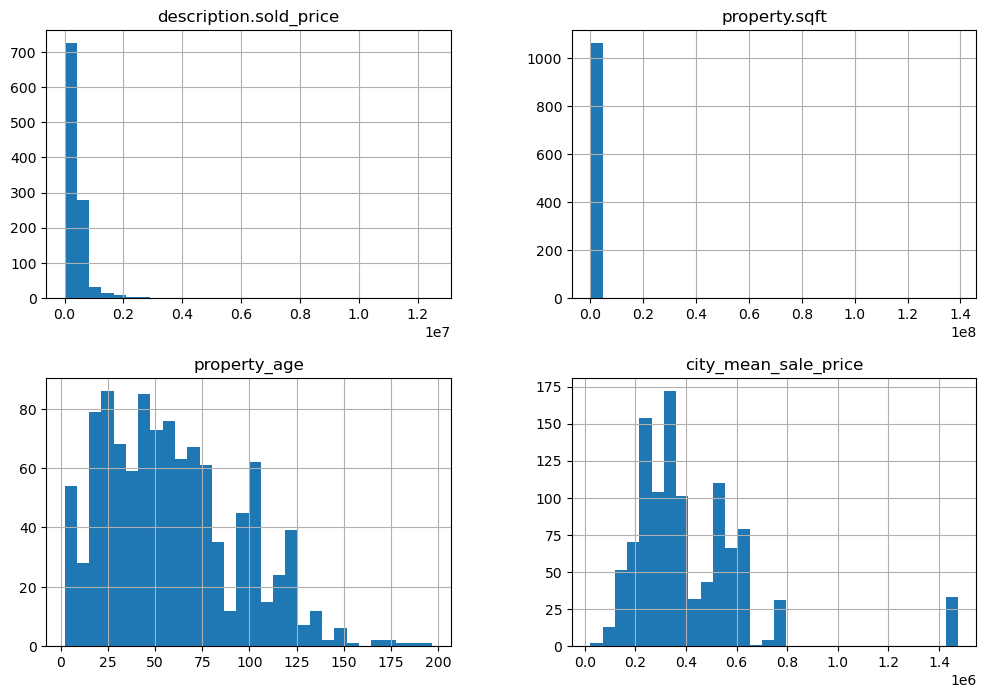

property.sqft             32.642887
description.sold_price    12.870945
city_mean_sale_price       2.397203
property_age               0.625771
dtype: float64


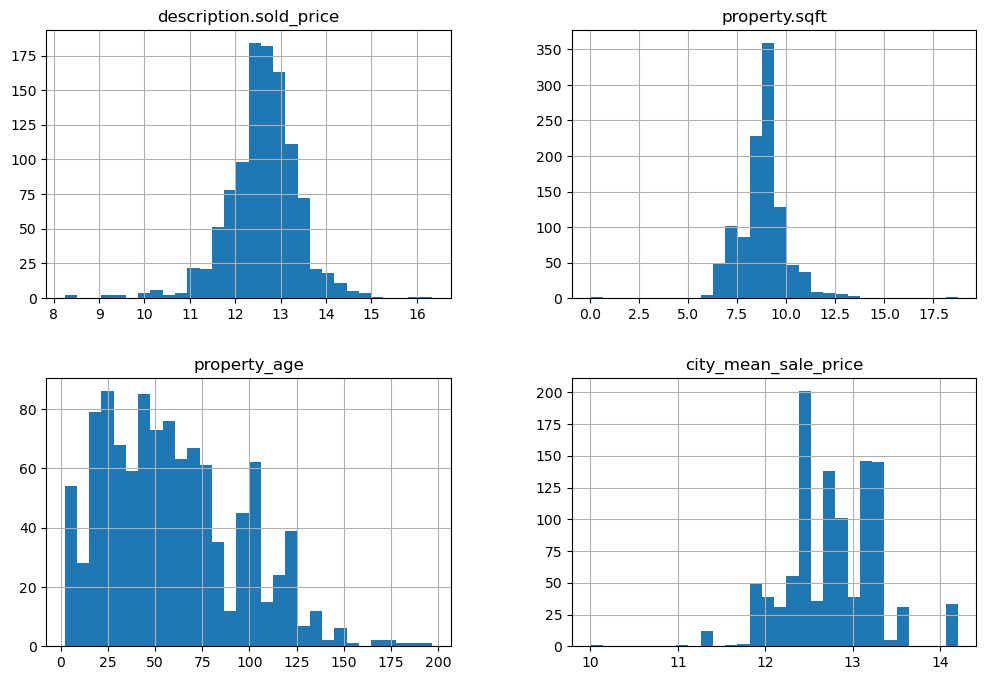

In [108]:
# perform EDA here

# Analyzing numerical variable dist.
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
numerical_columns = ['description.sold_price','property.sqft','property_age','city_mean_sale_price']
train[numerical_columns].hist(figsize=(12, 8), bins=30)
plt.show()

# Checking skewness
skewed_cols = train[numerical_columns].skew().sort_values(ascending=False)
print(skewed_cols)

# Apply log transformation for highly skewed columns
skewed_features = skewed_cols[skewed_cols > 1].index
train[skewed_features] = np.log1p(train[skewed_features])

train[numerical_columns].hist(figsize=(12, 8), bins=30)
plt.show()


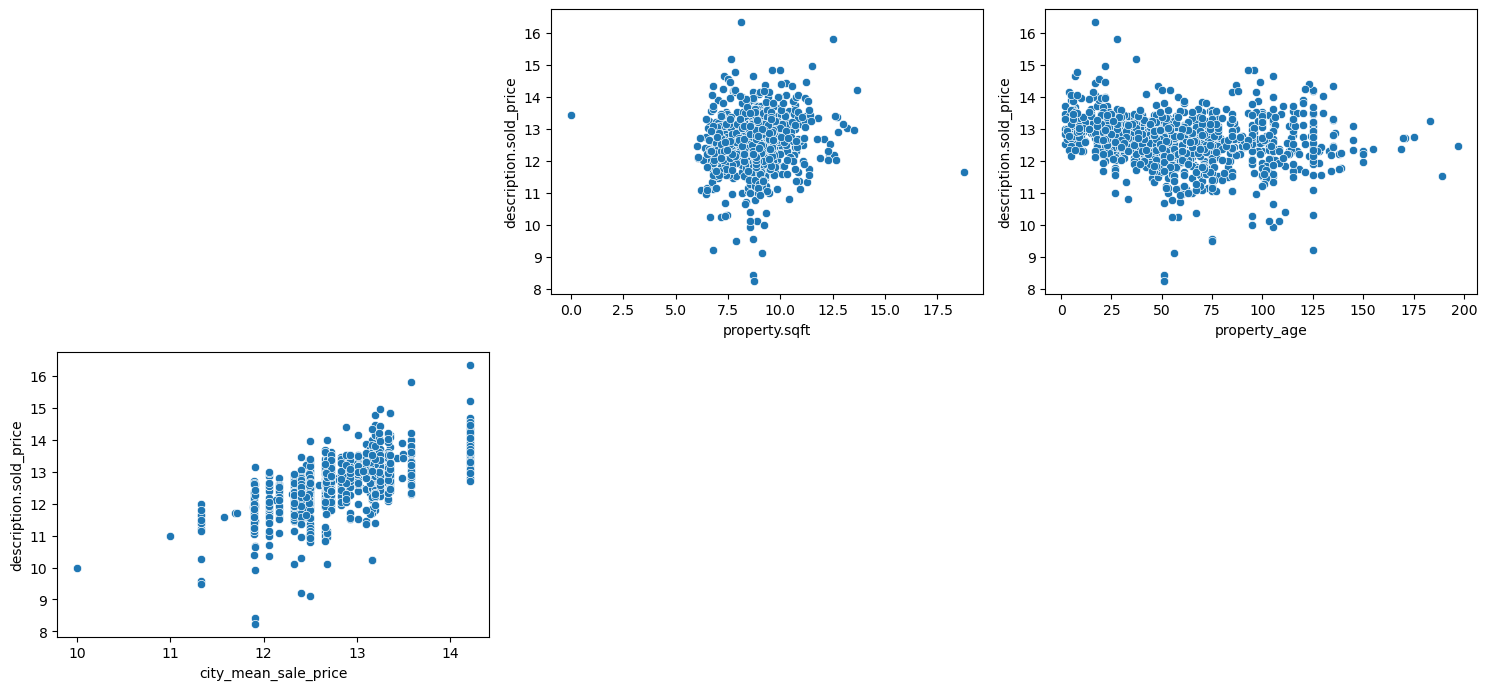

In [109]:
# Scatterplot to correlation between target variable and other variables

target_var = 'description.sold_price'

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    if col != target_var:
        plt.subplot(3, 3, i + 1)
        sns.scatterplot(x=train[col], y=train[target_var])
        plt.xlabel(col)
        plt.ylabel(target_var)

plt.tight_layout()
plt.show()

In [110]:
# dropping status column as its reppetitive and not needed - all are marked 'sold'

train = train.drop('status', axis=1)

In [111]:
train.columns

Index(['property_id', 'description.sold_price', 'description.baths',
       'description.garage', 'description.stories', 'description.beds',
       'description.type', 'location.address.postal_code',
       'location.address.coordinate.lon', 'location.address.coordinate.lat',
       'location.address.city', 'location.address.state_code',
       'location.county.name', 'property.sqft', 'property_age', 'basement',
       'central_air', 'community_outdoor_space', 'community_security_features',
       'dining_room', 'dishwasher', 'fireplace', 'forced_air',
       'garage_1_or_more', 'garage_2_or_more', 'hardwood_floors',
       'laundry_room', 'recreation_facilities', 'shopping', 'single_story',
       'two_or_more_stories', 'washer_dryer', 'city_mean_sale_price'],
      dtype='object')

In [113]:

train_only_numeric_cols = train.select_dtypes(include=['int64', 'float64'])

In [114]:
# Check for feature similarity using pairplots
sns.pairplot(train_only_numeric_cols)
plt.show()

# Computing feature similarity using correlation
redundant_features = []
for col in train_only_numeric_cols.columns:
    for col2 in train_only_numeric_cols.columns:
        if col != col2 and train_only_numeric_cols[col].corr(train_only_numeric_cols[col2]) > 0.85:
            redundant_features.append((col, col2))

print("Potential Redundant Features:", redundant_features)

Potential Redundant Features: []


In [ ]:
# no redundency!

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [117]:
processed_path = '../processed_data'

train.to_csv(os.path.join(processed_path, 'training_data_processed.csv'), index=False)